<a href="https://colab.research.google.com/github/kalebsampaco/Ejercicios-en-google-colab/blob/master/Procesado_de_texto_con_redes_recurrentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using TensorFlow backend.


17465344/17464789 [==============================] - 0s 0us/step
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 80)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 80, 128)           2560000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 80, 128)           131584    
_________________________________________________________________
flatten_1 (Flatten)          (None, 10240)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 10241     
Total params: 2,701,825
Trainable params: 2,701,825
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 130s 5ms/step - loss: 26.8459 - binary_accuracy: 0.7904 - val_loss: 0.3536 - val_binary_accuracy: 0.8434

Epoch 00001: val_binary_accuracy improved from -inf to 0.84344, saving model to deteccion_texto.h5
Epoch 2/5
25000/25000 [==============================] - 129s 5ms/step - loss: 1.5548 - binary_accuracy: 0.8951 - val_loss: 0.3841 - val_binary_accuracy: 0.8352

Epoch 00002: val_binary_accuracy did not improve from 0.84344
Epoch 3/5
25000/25000 [==============================] - 130s 5ms/step - loss: 0.1655 - binary_accuracy: 0.9377 - val_loss: 0.4773 - val_binary_accuracy: 0.8202

Epoch 00003: val_binary_accuracy did not improve from 0.84344
Epoch 4/5
25000/25000 [==============================] - 130s 5ms/step - loss: 18.7069 - binary_accuracy: 0.9529 - val_loss: 0.5089 - val_binary_accuracy: 0.8098

Epoch 00004: val_binary_accuracy did not improve from 0.84344
Epoch 5/5
25000

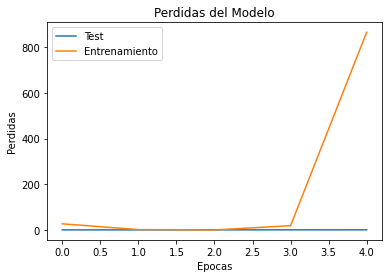

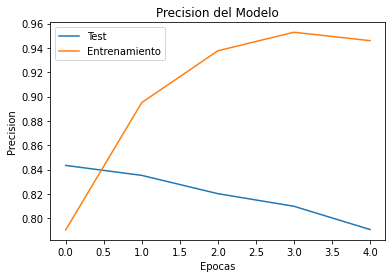

In [1]:
import sys
import json
import codecs
import numpy as np
import pandas as pd
from keras.callbacks import ModelCheckpoint
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM,Input,Bidirectional,GlobalMaxPool1D,Flatten,BatchNormalization,LeakyReLU
from keras.layers.convolutional import Conv1D,Conv2D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence,text
from keras import Model
from keras.models import load_model
from keras.datasets import imdb
import matplotlib.pylab as plt

#Variables de entrada
batch_size = 32
epochs = 30
tamano_embedding = 128
maximas_caracteristicas=20000
maxima_longitud=80

#Cargado de bases  de datos
(xentrenamiento,yentrenamiento),(xtest,ytest)=imdb.load_data(num_words=maximas_caracteristicas)
xentrenamiento=sequence.pad_sequences(xentrenamiento,maxlen=maxima_longitud)
xtest=sequence.pad_sequences(xtest,maxlen=maxima_longitud)

#Creacion de modelo
entrada = Input(shape=(maxima_longitud, ))
x = Embedding(maximas_caracteristicas, tamano_embedding)(entrada)
x = LSTM(tamano_embedding, return_sequences=True,activation='relu')(x)
x=Flatten()(x)
x = Dense(1, activation="sigmoid",kernel_initializer='zeros',bias_initializer='zeros')(x)
modelo = Model(inputs=entrada, outputs=x)
modelo.compile(loss='binary_crossentropy',optimizer='adam',metrics=['binary_accuracy'])
modelo.summary()


#entrenamiento
checkpoint = ModelCheckpoint('deteccion_texto.h5', monitor='val_binary_accuracy', verbose=1, save_best_only=True,save_weights_only=False, mode='auto')
history=modelo.fit(xentrenamiento, yentrenamiento, batch_size=batch_size, epochs=5, callbacks=[checkpoint],validation_data=(xtest,ytest), shuffle=True, verbose=1)

#visualizacion de resultaoos
plt.figure(1)
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('Perdidas del Modelo')
plt.ylabel('Perdidas')
plt.xlabel('Epocas')
plt.legend(['Test','Entrenamiento'], loc='upper left')

plt.figure(2)
plt.plot(history.history['val_binary_accuracy'])
plt.plot(history.history['binary_accuracy'])
plt.title('Precision del Modelo')
plt.ylabel('Precision')
plt.xlabel('Epocas')
plt.legend(['Test','Entrenamiento'], loc='upper left')

salida=modelo.predict(xentrenamiento[round(len(xentrenamiento[:,0])*0.9):round(len(xentrenamiento[:,0])),:])

salida[salida<0.5]=0
salida[salida>=0.5]=1

diferencia=abs(yentrenamiento[round(len(xentrenamiento[:,0])*0.9):round(len(xentrenamiento[:,0]))]-np.uint8(salida[:,0]))
puntos=diferencia[diferencia>0]
score=(1-(len(puntos)/len(diferencia)))

print('La mejor puntuacion es %f'% (score))
plt.show()
